In [4]:
import importlib,sys,local_utils
from local_utils import *

Translated from [verification_FR](./verification_FR.ipynb)

# Verification

This notebook presents the verification of:
- the conjecture,
- the recurrence formula used in the proof of Property G,
- the value of $D_{q,0} = p$ when $N = pq$, with $q$ the smallest divisor of $N$.


# Conjecture Verification

..................................................................................................100
....................................................................................................200
....................................................................................................300
....................................................................................................400
....................................................................................................500

temps total (s)/N: 0.0125 avec N= 500 Fmod True
..................................................................................................100
....................................................................................................200
....................................................................................................300
....................................................................................................400
...................

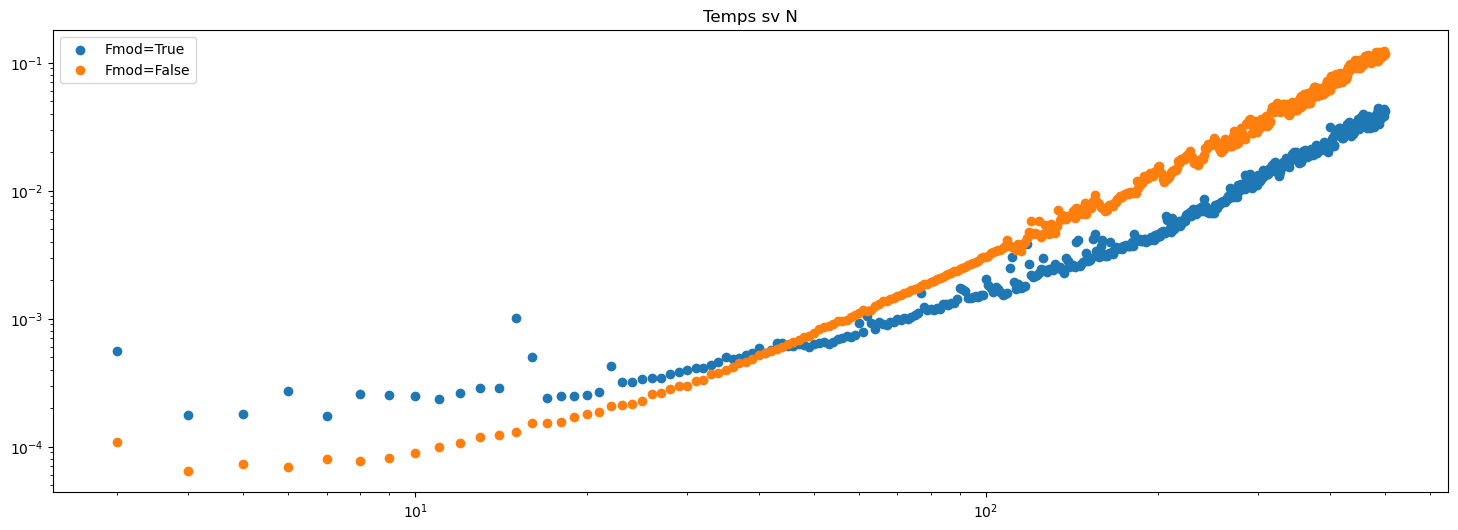

In [2]:
Nmax=500
temps_Fmod=VerificationDamierPascal(Nmax=Nmax,Fmod=True)    
temps=VerificationDamierPascal(Nmax=Nmax,Fmod=False)    

plt.figure(figsize=(18,6))
plt.title("Temps sv N")
plt.scatter(temps_Fmod["x"],temps_Fmod["y"],label="Fmod=True")
plt.scatter(temps["x"],temps["y"],label="Fmod=False")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()


It can be observed that applying the modulo $N$ operation directly during the computation of Pascal’s triangle significantly speeds up the construction of the Pascal Tiling.


# Verification of the Recurrence Formula (Property G)

$$S_{i,j}=S_{i-1,j-1}+\sum_{k=0}^{j-1}S_{i-2-k,j-k}+A_{q-1,0}-B_{q-1,0}$$


In [31]:
def GetFrec(i,j,A,B,S):
    q=i-j
    value=S[i-1,j-1]
    for k in range(0,j-1+1):
        value+=S[i-2-k,j-k]
    value+=A[q-1,0]-B[q-1,0]
    return value

for N in range(5,20):
    erreur=0
    ok=0
    A=damier_pascal_A(N)
    B=damier_pascal_B(N)
    S=damier_pascal_S(N)
    ok=0
    for i in range(3,N):
        for j in range(1,i-2):
            sij=S[i,j]
            if sij!=GetFrec(i,j,A,B,S):
                erreur+=1
                print("erreur","N",N,"i",i,"j",j,"erreur",erreur,"sij",sij,"GetFrec",GetFrec(i,j,A,B,S))
            else:
                ok+=1
    print("N=",N,"ok=",ok,"erreur=",erreur)
            

N= 5 ok= 1 erreur= 0
N= 6 ok= 3 erreur= 0
N= 7 ok= 6 erreur= 0
N= 8 ok= 10 erreur= 0
N= 9 ok= 15 erreur= 0
N= 10 ok= 21 erreur= 0
N= 11 ok= 28 erreur= 0
N= 12 ok= 36 erreur= 0
N= 13 ok= 45 erreur= 0
N= 14 ok= 55 erreur= 0
N= 15 ok= 66 erreur= 0
N= 16 ok= 78 erreur= 0
N= 17 ok= 91 erreur= 0
N= 18 ok= 105 erreur= 0
N= 19 ok= 120 erreur= 0


In [166]:
# on vérifie ici que S_{q,0}[pq]=p 
# N=p*q avec p>=3 et q le plus petit diviseur de N

# verification
qmax=30 # >3
pmax=100 # >3
erreur=0
ok=0
print("q=",end="")
for q in range(3,qmax):
    # on utilise la fonction isprime de sympy
    if isprime(q):
        print(q,end=",")
        for p in range(3,pmax):
            N=p*q
            if q==min(factorint(N).keys()):

                S=damier_pascal_S(N)

                sq0=S[q,0]

                sq0N=sq0%N

                if sq0N!=p:
                    print()
                    print("ERROR "+cas,"p",p,"q",q,"N=pq",N)
                    print( "S[q,0]%N    ",sq0N," != ? ",p)
                    erreur+=1
                else:
                    ok+=1
            

print()
print("Bilan Verification","ok",ok,"erreur",erreur)

q=3,5,7,11,13,17,19,23,29,
Bilan Verification ok 217 erreur 0


# Example Display

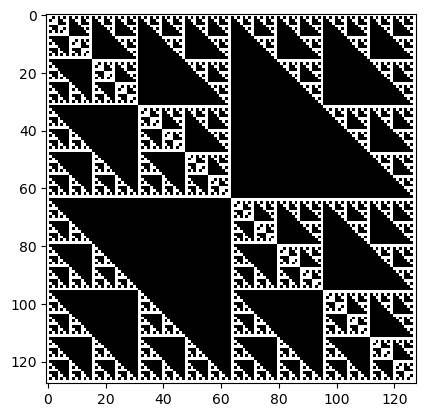

In [22]:
A=damier_pascal_A(128)%2
plt.figure()
plt.imshow(A.astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
plt.savefig("./examples/PascalFractal_128_mod_2.png")
plt.show()

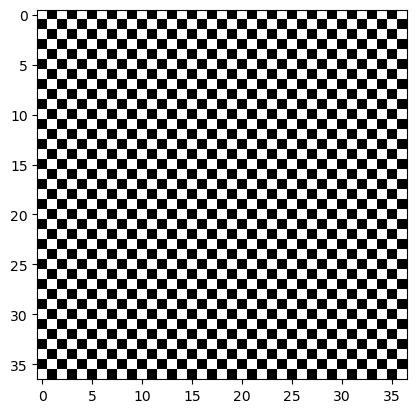

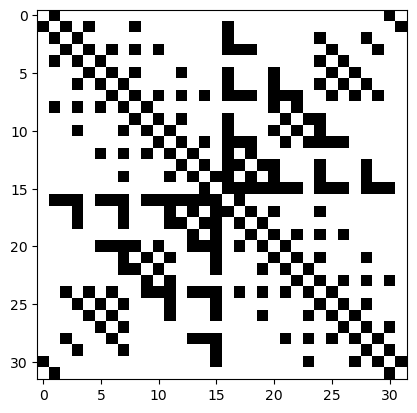

In [30]:
D=damier_pascal_D(37,Fmod=True)
plt.figure()
plt.imshow(D.astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
plt.savefig("./examples/DamierPascal_37.png")
plt.show()
D=damier_pascal_D(32,Fmod=True)
plt.figure()
plt.imshow(D.astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
plt.savefig("./examples/DamierPascal_32.png")
plt.show()

In [14]:
for N in range(3,128+1):
    print(N,end=" ")
    filename = f"./examples/DamierPascal_{N}.png"
    #plt.figure()
    plt.imshow(damier_pascal_D(N,Fmod=True).astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.savefig(filename)
    #plt.show()
    plt.close()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 

In [19]:
print(damier_pascal_D(8,Fmod=True))
print(type(damier_pascal_D(8,Fmod=True)[0,0]))

[[1 0 1 1 1 1 0 1]
 [0 1 0 1 0 1 1 0]
 [1 0 1 0 0 1 1 1]
 [1 1 0 1 0 0 0 1]
 [1 0 0 0 1 0 1 1]
 [1 1 1 0 0 1 0 1]
 [0 1 1 0 1 0 1 0]
 [1 0 1 1 1 1 0 1]]
<class 'int'>
